# Probability
Probability is a measure of the likelihood or chance of a particular event occuring. It quantifies uncertainty and helps us make prediction and informed decisions based on the likelihood of various outcomes. 

## Bayes Theorem 
Is a powerful tool in probability and statistics for updating the probability of a hypothesis based on new evidence. It is widely used in various fields such as medical diagonosis, machine learning, and data analysis. The theorem is stated as follows

$P(A∣B)= {P(B∣A)⋅P(A)}/P(B)$

where: 

$​P(A∣B)$ is the posterior probability: the probability of hypothesis $A$ given the evidence $B$.

$​P(B∣A)$ is the likelihood: the probability of evidence $B$ given that hypothesis $A$ is true.

$P(A)$ is the prior probability: the initial probability of hypothesis $A$ before seeing the evidence.

$P(B)$ is the marginal likelihood: the total probability of the evidence under all possible hypotheses.


For the example below, we create two histogram and joint two distribution together.


Area under PDF 1 (mean=41.97088672876907, std=1.8759155143922779): 0.9998987641729211
Area under PDF 2 (mean=52.95563387419381, std=3.979096399680997): 0.9987613993087624


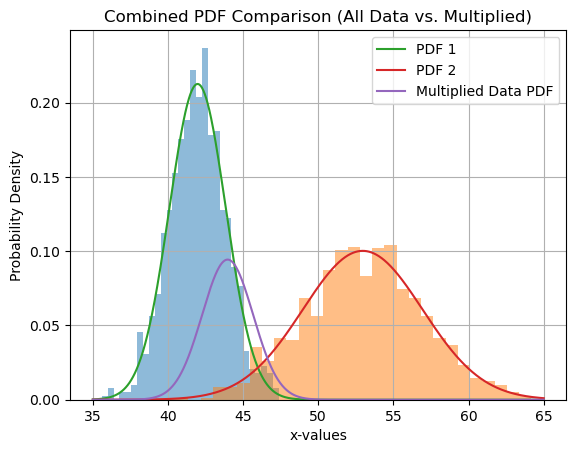

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

# Generate data with specific mean and standard deviation 
np.random.seed(10)
x1 = np.random.normal(42, 2, 1000)
x2 = np.random.normal(53, 4, 1000)

# Calculate means and standard deviation for the generated data
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)

# Create x values for plotting the PDF
x_values = np.linspace(35 , 65 , 1000)

# Calculate PDF values for both datasets
pdf_values1 = norm.pdf(x_values, loc = mean1, scale = std1)
pdf_values2 = norm.pdf(x_values, loc = mean2, scale = std2)

# Multiplied the PDFs of the two datasets and scale by 100
pdf_combined = np.zeros_like(pdf_values1)
for i in range(len(pdf_values1)): 
  pdf_combined[i] = (pdf_values1[i] * pdf_values2[i]) * 100
pdf_combined = pdf_values1 * pdf_values2 * 100

# Define a function to calculate the normal PDF
def normal_pdf(x, mean, std):
  return (1 / (std * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std**2))

# Calculate the PDF values using the defined function
y_values1 = normal_pdf(x_values, mean1, std1)
y_values2 = normal_pdf(x_values, mean2, std2)

# Calculate the area under each PDF curve using numerical integration
area1 = np.trapz(y_values1, x_values)
area2 = np.trapz(y_values2, x_values)

# Print the area under each PDF curve
print(f"Area under PDF 1 (mean={mean1}, std={std1}):", area1)
print(f"Area under PDF 2 (mean={mean2}, std={std2}):", area2)

# Create the plot
plt.hist(x1, density= True, bins = 30, alpha = 0.5)
plt.hist(x2, density= True, bins = 30, alpha = 0.5)
plt.plot(x_values, pdf_values1, label = 'PDF 1')
plt.plot(x_values, pdf_values2, label = 'PDF 2')
plt.plot(x_values, pdf_combined, label='Multiplied Data PDF')

# Add labels, title, legend, and grid to the plot
plt.xlabel('x-values')
plt.ylabel('Probability Density')
plt.title('Combined PDF Comparison (All Data vs. Multiplied)')
plt.legend()
plt.grid(True)
plt.show()


By joint 2 distribution together, we can see where 2 distribution are both likely to occur, which can show as $P(A \cap B)$

In [2]:
from scipy.stats import norm

# Given data point (evidence)
evidence = 50

# Calculate the likelihood using PDFs
likelihood_H1 = norm.pdf(evidence, loc = mean1, scale = std1)
likelihood_H2 = norm.pdf(evidence, loc = mean2, scale = std2)

# Assume equal priors for both hypotheses
prior_H1 = 0.5
prior_H2 = 0.5

# Calculate the marginal likelihood (total probability of the evidence)
marginal_likelihood = likelihood_H1 * prior_H1 + likelihood_H2 * prior_H2

# Calculate the posterior probabilities using Bayes' Theorem
posterior_H1 = (likelihood_H1 * prior_H1) / marginal_likelihood
posterior_H2 = (likelihood_H2 * prior_H2) / marginal_likelihood

# Print the posterior 
print(f"Posterior probability of H1 given the evidence: {posterior_H1}")
print(f"Posterior probability of H2 given the evidence: {posterior_H2}")

Posterior probability of H1 given the evidence: 0.000293946727947517
Posterior probability of H2 given the evidence: 0.9997060532720524


For the example above, using Bayes Theorem to calculate the likelihood of the two normal distribution given the evidence at 50. 

After applying Bayes' theorem, we find that the posterior probability of hypothesis H2 is significantly higher than that of H1 given the evidence.

In the plotted graph, the orange curve representing H2's distribution shows its mean (center) closer to the evidence point $x=50$. On the other hand, the blue curve representing H1's distribution has its mean farther away from $x = 50$. 

By applying Bayes' Theorem, we can assess how the pbserved evidence updates out prior beliefs about which hypothesis (H1 or H2) is more likely, based on how closely their distribution align with the observed data point $x=50$

## Credible interval 

A credible interval is a concept from bayesian statistic that represent an interval within which an unknown parameter (such as the mean of a distribution) lies with a certain probability, based on the posterior distribution. For example, a 95% credible interval means that there is 95% probability, given the data and the prior distribution.

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# Generate data 
np.random.seed(10)
x = np.linspace(0, 5, 1000)
y = 0.5*x**2 - 2 * x + 1
y_noise = y + np.random.normal(0, 3, len(x))

# Design a matrix for quadratic regression 
matrix = np.vstack([x**2, x, np.ones(len(x))]).T

# Perform Singular Value Decomposition (SVD) on the design matrix 
U, d, VT = np.linalg.svd(matrix, full_matrices=False)

# Compute the regression coefficients using the pseudoinverse
d_inv = np.diag(1/d)
y_col = y_noise[:, np.newaxis]
beta = VT.T @ d_inv @ U.T @ y_col
beta = beta.flatten()

# Print the computed coefficients
print(beta)



[ 0.50184393 -2.12977956  1.2654052 ]


Then we can generate some random data around the coefficient

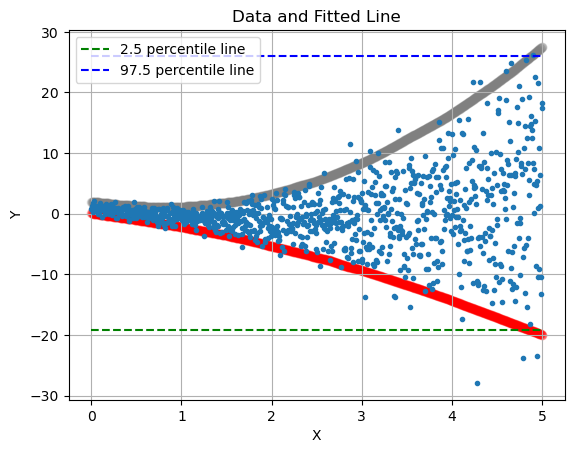

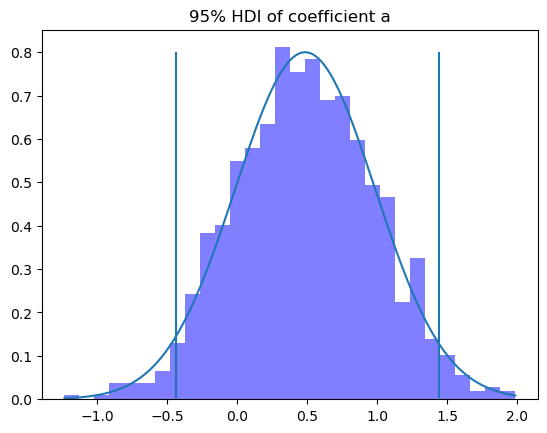

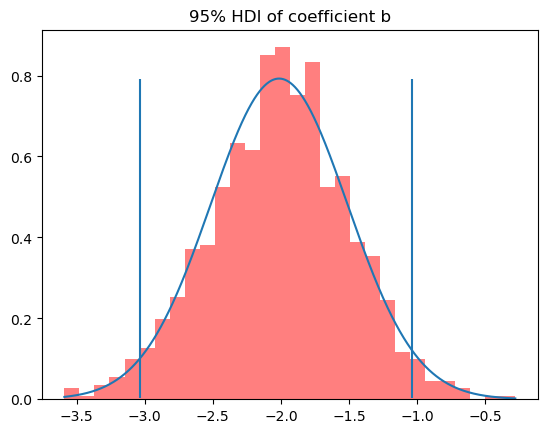

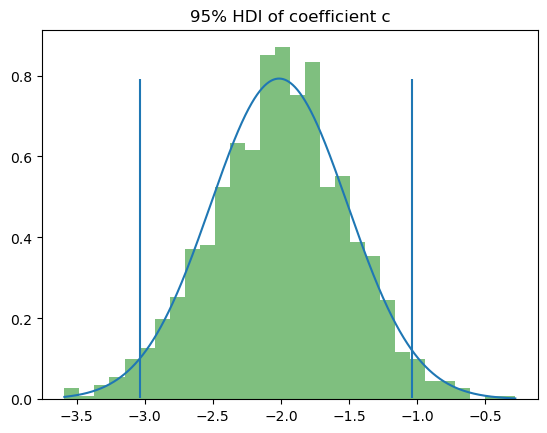

In [4]:
np.random.seed(15)

# Generate new x values
X = np.linspace(0, 5, 1000)

# Generate random data base on the coefficients from above 
a = np.random.normal(0.5, 0.5, 1000)
b = np.random.normal(-2, 0.5, 1000)
c = np.random.normal(1, 0.5, 1000)

# Generate new Y values 
Y = a*x**2 + b*x + c 
plt.plot(X, Y, '.')
bound1 = []
upper_bound = []
lower_bound = [] 

# Calculate the 95% high density 
for i in range(len(X)): 
    y_values = a * X[i] ** 2 + b * X[i] + c
    bound1.append(y_values)
    lower_bound.append(np.percentile(y_values, 2.5))
    upper_bound.append(np.percentile(y_values, 97.5))
    plt.scatter(X[i], np.percentile(y_values, 2.5), color='red', alpha=0.2)
    plt.scatter(X[i], np.percentile(y_values, 97.5), color='gray', alpha=0.2)

# Create a lower and upper bound for each coefficient (95% HDI)    
a_lower = np.percentile(a, 2.5)
a_upper = np.percentile(a, 97.5)
b_lower = np.percentile(b, 2.5)
b_upper = np.percentile(b, 97.5)
c_lower = np.percentile(c, 2.5)
c_upper = np.percentile(c, 97.5)

# Draw a 95% HDI for the equation 
percentile1 = np.percentile(lower_bound, 2.5)
percentile2 = np.percentile(upper_bound, 97.5)
plt.hlines(percentile1, X.min(), X.max(), colors='green', linestyles='--', label='2.5 percentile line')
plt.hlines(percentile2, X.min(), X.max(),colors='blue', linestyles='--', label='97.5 percentile line')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Fitted Line')
plt.legend()
plt.grid(True)
plt.show()

x_a = np.linspace(np.min(a), np.max(a), 1000)
pdf_a = norm.pdf(x_a, loc = np.mean(a), scale = np.std(a))
plt.hist(a, density= True, bins = 30, alpha = 0.5, color = 'blue')
plt.plot(x_a, pdf_a)
plt.title('95% HDI of coefficient a')
plt.vlines(a_lower, pdf_a.min(),pdf_a.max())
plt.vlines(a_upper, pdf_a.min(),pdf_a.max())
plt.show()

x_b = np.linspace(np.min(b), np.max(b), 1000)
pdf_b = norm.pdf(x_b, loc = np.mean(b), scale = np.std(b))
plt.hist(b, density= True, bins = 30, alpha = 0.5, color = 'red')
plt.plot(x_b, pdf_b)
plt.title('95% HDI of coefficient b')
plt.vlines(b_lower, pdf_b.min(),pdf_b.max())
plt.vlines(b_upper, pdf_b.min(),pdf_b.max())
plt.show()

x_b = np.linspace(np.min(b), np.max(b), 1000)
pdf_b = norm.pdf(x_b, loc = np.mean(b), scale = np.std(b))
plt.hist(b, density= True, bins = 30, alpha = 0.5, color = 'green')
plt.plot(x_b, pdf_b)
plt.title('95% HDI of coefficient c')
plt.vlines(b_lower, pdf_b.min(),pdf_b.max())
plt.vlines(b_upper, pdf_b.min(),pdf_b.max())
plt.show()


For the example below, we aim to demonstrate that we can combine every distribution together to evaluate the likelihood of the event occurring.

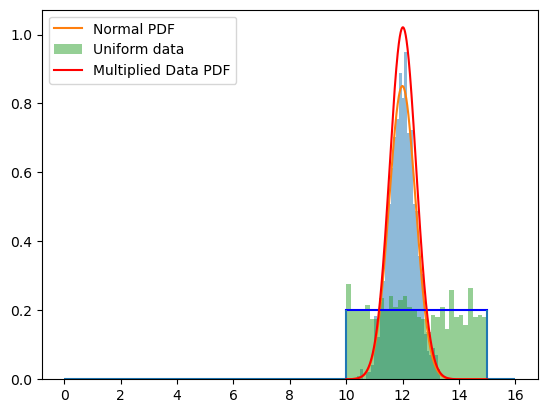

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm

# Define the range for uniform distribution
a= 10
b= 15

np.random.seed(10)

# Generate normal distribution data with mean 12 and std 0.5
x_normal = np.random.normal(12, 0.5, 1000) 

# Define a function to compute the normal PDF
def normal_pdf(x, mean, std):
  return (1 / (std * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std**2))

# Compute the normal PDF values for the generated data
y_normal = normal_pdf(x_normal, 12, 0.5)

# Generate x values for plotting the PDF
x_values = np.linspace(a, b, 1000)

# Compute the PDF values for the normal distribution
pdf_values = norm.pdf(x_values, loc= np.mean(x_normal), scale= np.std(x_normal))

np.random.seed(15) 

# Generate uniform distribution data 
uniform_dist = np.random.uniform(a, b, 1000)
uniform_values = np.linspace(a, b, 1000)

# Compute the y values for the uniform distribution (constant probability)
y_axis = np.ones_like(uniform_values) / (b-a)

# Initialize an array for the combined PDF values
pdf_combined = np.zeros_like(pdf_values)  

# Compute the combined PDF values by multiplying the normal PDF with the uniform values
for i in range (len(pdf_values)):
  pdf_combined[i] = (pdf_values[i] * uniform_values[i]) / 10


plt.hist(x_normal, bins= 30, density= True, alpha= 0.5)
plt.plot(x_values, pdf_values, label= 'Normal PDF')
plt.hist(uniform_dist, bins= 30, density=True, alpha= 0.5, label= 'Uniform data')
plt.plot(uniform_values, y_axis, color= 'blue')
plt.hlines(0,0,10)
plt.hlines(0,15,16)
plt.vlines(10,0,0.2)
plt.vlines(15,0,0.2)
plt.plot(x_values, pdf_combined, label='Multiplied Data PDF', color='red')
plt.legend()
plt.show()



